# Basics of Machine Learning

**Суть работы**

В этой работе мы рассмотрим два подхода в области обучения с учителем в машинном обучении:
1. Классификация
2. Регрессия

*Немного определений:*

## **Регрессия**

Регрессия является еще одним важным и широко используемым инструментом статистического и машинного обучения. Основная цель задач на основе регрессии — предсказать выходные метки или ответы, которые являются продолженными числовыми значениями, для заданных входных данных. Результат будет основан на том, что модель выучила на этапе обучения. В основном, регрессионные модели используют функции входных данных (независимые переменные) и соответствующие им непрерывные числовые выходные значения (зависимые или выходные переменные), чтобы узнать конкретную связь между входными данными и соответствующими выходными данными.

### Основные методы регрессии

#### [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Линейная регрессия используется для прогнозирования взаимосвязи между двумя переменными путем применения линейного уравнения к наблюдаемым данным. Существует два типа переменных, одна переменная называется независимой переменной, а другая - зависимой переменной

```python
>>> import numpy as np
>>> from sklearn.linear_model import LinearRegression
>>> X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
>>> # y = 1 * x_0 + 2 * x_1 + 3
>>> y = np.dot(X, np.array([1, 2])) + 3
>>> reg = LinearRegression().fit(X, y)
>>> reg.score(X, y)
1.0
>>> reg.coef_
array([1., 2.])
>>> reg.intercept_
3.0...
>>> reg.predict(np.array([[3, 5]]))
array([16.])
```

#### [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)

#### [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor)

## **Классификация**

Модели классификации используются для принятия решений или распределения элементов по категориям. В отличие от регрессионных моделей, которые возвращают числа в непрерывном диапазоне, такие как значения роста или веса, модели классификации возвращают логические значения (true или false) или решения в виде категорий, таких как "яблоко", "банан" или "вишня".

### Основные методы классификации

#### [LogisticRegreession](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

Логистическая регрессия — это модель классификации, которая работает аналогично линейной регрессии.

Логистическая регрессия лучше подходит для оценки логических результатов, чем линейная, так как логистическая кривая всегда дает значение от 0 (false, ложь) до 1 (true, истина). Любое значение между этими двумя пороговыми уровнями можно рассматривать как вероятность.

Например, предположим, мы пытаемся предсказать, сойдет ли сегодня лавина. Если наша модель логистической регрессии дает нам значение 0,3, то вероятность лавины оценивается в 30 %.

Ниже представлен пример реализации 
```python
>>> from sklearn.datasets import load_iris
>>> from sklearn.linear_model import LogisticRegression
>>> X, y = load_iris(return_X_y=True)
>>> clf = LogisticRegression(random_state=0).fit(X, y)
>>> clf.predict(X[:2, :])
array([0, 0])
>>> clf.predict_proba(X[:2, :])
array([[9.8...e-01, 1.8...e-02, 1.4...e-08],
       [9.7...e-01, 2.8...e-02, ...e-08]])
>>> clf.score(X, y)
0.97...
```

#### [Support Vector Classification](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

#### [Nearest Neighbors Classification](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)

#### [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

## Общий пайплайн в решении задач машинного обучения

1. Чтение данных
2. Предобработка данных:
    1. Нормализация
    2. Кодирование данных: *(мужчина/женщина -> 0/1)*
    3. [Дискретизация данных](https://scikit-learn.org/stable/modules/preprocessing.html#discretization)
3. Разбиение на обучающую и тестовую выборки
4. Работа с моделями:
    1. Обучение на обучающих данных
    2. Получение метрики на тестовых данных
    3. Анализ результата
5. Применение методики кросс-валидации для предотвращения переобучения модели
6. Поиск лучших параметров для моделей в рамках задачи

## Приложение

1. [SKlearn](https://scikit-learn.org/stable/index.html) - библиотека для работы с моделями машинного обучения, предобработки данных и визуализации
2. [CatBoost](https://catboost.ai/en/docs/) - продвинутая библиотека для реализации моделей ансамблей деревьев выбора 

## Пример ответного файла

Пример файла результата представлен в `test_submission.csv`.

### **Как называть файл?**
Файл называть следует в соответствии со своей фамилией. Например, если работу выполняли два человека, называть файл следует:

**`Ivanov_Petrov.csv`**

Загружать файл с результатом также необходимо в форму

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, mean_squared_error

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

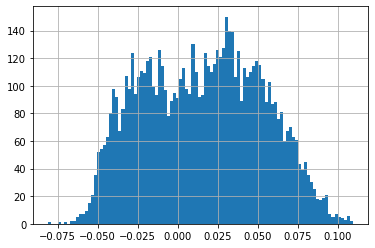

In [31]:
train_df.target_1.hist(bins=100)

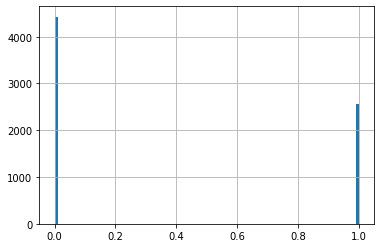

In [32]:
train_df.target_2.hist(bins=100)

train dataset -> training and validation

In [33]:
def train_test_split(train, random_seed=1, validation_size=0.8):
    np.random.seed(random_seed)
    split_index = int(train.shape[0] * validation_size)
    train = train.iloc[np.random.permutation(train_df.shape[0])]
    train_dataset = train.iloc[: split_index]
    val_dataset = train.iloc[split_index : ]
    return train_dataset, val_dataset

In [34]:
train_dataset, val_dataset = train_test_split(train_df, random_seed=1, validation_size=0.8)
train_dataset.shape, val_dataset.shape

((5600, 14), (1400, 14))

In [35]:
train_feature = train_dataset.drop(columns=['target_1', 'target_2'])
train_target = train_dataset[['target_1', 'target_2']].values

val_feature = val_dataset.drop(columns=['target_1', 'target_2']).values
val_target = val_dataset[['target_1', 'target_2']].values

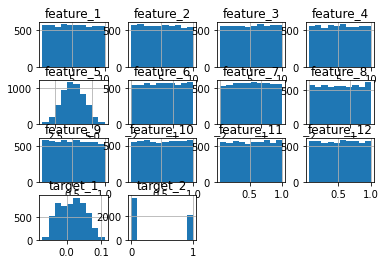

In [36]:
ax = train_dataset.hist()

In [37]:
train_dataset.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,target_1,target_2
count,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000
mean,5.241613,5.207249,5.266892,5.240435,3.737027,-1.244144,-1.247699,-1.245183,0.520054,0.526568,0.527825,0.525716,0.015508,0.368929
std,2.731169,2.738920,2.748180,2.737785,0.755338,0.432155,0.429315,0.437041,0.272903,0.275228,0.276045,0.274612,0.037146,0.482558
min,0.500793,0.500141,0.500788,0.501571,1.642860,-1.999891,-1.999945,-1.999926,0.050212,0.050130,0.050054,0.050458,-0.069501,0.000000
25%,2.895017,2.816258,2.887539,2.867341,3.198132,-1.616922,-1.615806,-1.624247,0.286035,0.287594,0.289030,0.287074,-0.015961,0.000000
50%,5.242610,5.217905,5.287087,5.244472,3.730667,-1.240656,-1.246085,-1.244799,0.518623,0.527188,0.532050,0.530605,0.016719,0.000000
75%,7.608702,7.549617,7.657545,7.601236,4.279071,-0.869939,-0.880249,-0.864824,0.755112,0.766990,0.766302,0.761286,0.044651,1.000000
max,9.999469,9.999837,9.995595,9.998912,5.864418,-0.500274,-0.500072,-0.500025,0.999937,0.999944,0.999839,0.999640,0.109403,1.000000


# regression

In [38]:
train_regression = train_target[:, 0]
val_regression = val_target[:, 0]

### normalization

In [40]:
train_feature.max(), train_feature.min()

(feature_1     9.999469
 feature_2     9.999837
 feature_3     9.995595
 feature_4     9.998912
 feature_5     5.864418
 feature_6    -0.500274
 feature_7    -0.500072
 feature_8    -0.500025
 feature_9     0.999937
 feature_10    0.999944
 feature_11    0.999839
 feature_12    0.999640
 dtype: float64, feature_1     0.500793
 feature_2     0.500141
 feature_3     0.500788
 feature_4     0.501571
 feature_5     1.642860
 feature_6    -1.999891
 feature_7    -1.999945
 feature_8    -1.999926
 feature_9     0.050212
 feature_10    0.050130
 feature_11    0.050054
 feature_12    0.050458
 dtype: float64)

## fitting
### Линейная регрессия

In [41]:
def rmse(truth, predicts):
    return np.sqrt(np.mean((truth - predicts)**2))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


RMSE: 0.022, std: 0.036


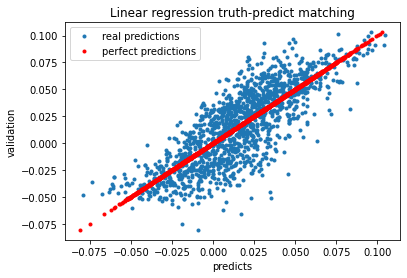

In [42]:
linear_regression = LinearRegression()

linear_regression.fit(train_feature, train_regression)
predicts = linear_regression.predict(val_feature)
print('RMSE: {:.3f}, std: {:.3f}'.format(np.sqrt(mean_squared_error(predicts, val_regression)), val_regression.std()))

plt.plot(predicts, val_regression, '.', label='real predictions')
plt.plot(val_regression,val_regression,'.r', label='perfect predictions')
plt.xlabel('predicts')
plt.ylabel('validation')
plt.title('Linear regression truth-predict matching')
plt.legend()
plt.show()

RMSE: 0.021, std: 0.036


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


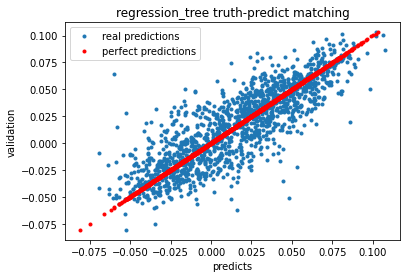

In [ ]:
regression_tree = DecisionTreeRegressor()

regression_tree.fit(train_feature, train_regression)
predicts = regression_tree.predict(val_feature)
print('RMSE: {:.3f}, std: {:.3f}'.format(np.sqrt(mean_squared_error(predicts, val_regression)), val_regression.std()))

plt.plot(predicts, val_regression, '.', label='real predictions')
plt.plot(val_regression, val_regression, '.r', label='perfect predictions')
plt.xlabel('predicts')
plt.ylabel('validation')
plt.title('regression_tree truth-predict matching')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


RMSE: 0.026, std: 0.036


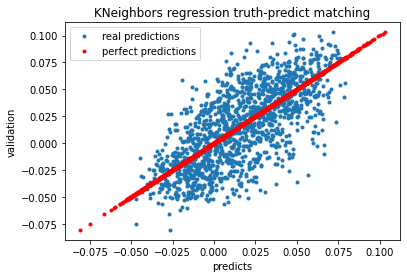

In [ ]:
kneighbors_regression = KNeighborsRegressor()

kneighbors_regression.fit(train_feature, train_regression)
predicts = kneighbors_regression.predict(val_feature)
print('RMSE: {:.3f}, std: {:.3f}'.format(np.sqrt(mean_squared_error(predicts, val_regression)), val_regression.std()))

plt.plot(predicts, val_regression, '.', label='real predictions')
plt.plot(val_regression,val_regression,'.r', label='perfect predictions')
plt.xlabel('predicts')
plt.ylabel('validation')
plt.title('KNeighbors regression truth-predict matching')
plt.legend()
plt.show()

## classification

In [ ]:
train_classification = train_target[:, 1]
val_classification = val_target[:, 1]

In [ ]:
train_classification

array([1., 1., 0., ..., 0., 0., 1.])

In [ ]:
classifier = LogisticRegression()
classifier.fit(train_feature, train_classification)
predicts = classifier.predict(val_feature)
print('accuracy: {:.2f}%'.format((predicts == val_classification).sum() / len(val_classification) * 100))

accuracy: 81.57%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
100 * (predicts == val_classification).sum() / len(predicts == val_classification)

81.57142857142857

**f1-score metric**

precision and recall

In [ ]:
def f1_score(truth, predicts):
    tn, fp, fn, tp = pd.crosstab(predicts, val_classification).values.ravel()
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * (precision * recall) / (precision + recall)
    return f1

In [ ]:
classifier = LogisticRegression()
classifier.fit(train_feature, train_classification)
predicts = classifier.predict(val_feature)
print('accuracy: {:.2f}%'.format((predicts == val_classification).sum() / len(val_classification) * 100))
print('f1_score: {:.2f}%'.format(f1_score(val_classification, predicts) * 100))

accuracy: 81.57%
f1_score: 73.24%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(train_feature, train_classification)
predicts = classifier.predict(val_feature)
print('accuracy: {:.2f}%'.format((predicts == val_classification).sum() / len(val_classification) * 100))
print('f1_score: {:.2f}%'.format(f1_score(val_classification, predicts) * 100))

accuracy: 84.57%
f1_score: 78.27%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
classifier = KNeighborsClassifier()
classifier.fit(train_feature, train_classification)
predicts = classifier.predict(val_feature)
print('accuracy: {:.2f}%'.format((predicts == val_classification).sum() / len(val_classification) * 100))
print('f1_score: {:.2f}%'.format(f1_score(val_classification, predicts) * 100))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


accuracy: 76.93%
f1_score: 66.04%


In [ ]:
classifier = SVC()
classifier.fit(train_feature, train_classification)
predicts = classifier.predict(val_feature)
print('accuracy: {:.2f}%'.format((predicts == val_classification).sum() / len(val_classification) * 100))
print('f1_score: {:.2f}%'.format(f1_score(val_classification, predicts) * 100))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


accuracy: 87.50%
f1_score: 81.94%


## cross-validation

In [ ]:
def scorer(model, X, y):
    return f1_score(y, model.predict(X))

model = LogisticRegression()
cross_val = cross_val_score(
    model,
    train_df.drop(columns=['target_1', 'target_2']),
    train_df['target_2'],
    cv=5,
    scoring='f1',
) * 100

print('{:.2f} +- {:.2f}'.format(cross_val.mean(), cross_val.std()))

72.96 +- 0.64


In [ ]:
model = DecisionTreeClassifier()
cross_val = cross_val_score(
    model,
    train_df.drop(columns=['target_1', 'target_2']),
    train_df['target_2'],
    cv=5,
    scoring='f1',
) * 100

print('{:.2f} +- {:.2f}'.format(cross_val.mean(), cross_val.std()))

78.03 +- 0.93


In [ ]:
model = KNeighborsClassifier()
cross_val = cross_val_score(
    model,
    train_df.drop(columns=['target_1', 'target_2']),
    train_df['target_2'],
    cv=5,
    scoring='f1',
) * 100

print('{:.2f} +- {:.2f}'.format(cross_val.mean(), cross_val.std()))

67.86 +- 2.20


In [ ]:
model = SVC()
cross_val = cross_val_score(
    model,
    train_df.drop(columns=['target_1', 'target_2']),
    train_df['target_2'],
    cv=5,
    scoring='f1',
) * 100

print('{:.2f} +- {:.2f}'.format(cross_val.mean(), cross_val.std()))

82.47 +- 1.29


## GridSearchCV

**[metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)**

1. f1
2. neg_mean_squared_error

In [73]:
class_model_params = {
    'svm': {
        'model': SVC(tol=0.0001),
        'params' : {
            'C': [1,2,4,6,8,10,12,14,16,18,20],
            'kernel': ['linear','rbf','sigmoid'],
            'gamma': ['auto','scale']
        }  
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,2,4,6,8,10,12,14,16,18,20]
        }
    },
    'kneighbors_classifier': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [5,10,15],
            'algorithm': ['auto','ball_tree','kd_tree']
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            'splitter': ['best','random']
        }
    }     
}
scores_1 = []
for model_name_1, mp_1 in class_model_params.items():
    clf_1 = GridSearchCV(mp_1['model'], mp_1['params'], scoring='f1',cv=5)
    clf_1.fit(train_df.drop(columns=['target_1', 'target_2']), train_df['target_2'])
    scores_1.append({
        'model': model_name_1,
        'best_score': clf_1.best_score_,
        'best_params': clf_1.best_params_
    })
    
df_1 = pd.DataFrame(scores_1,columns=['model','best_score','best_params'])

reg_model_params = {
    'linear_regression': {
        'model': LinearRegression(),
        'params' : {
            'fit_intercept': ['True','False']
        }  
    },
    'decision_tree_regressor' : {
        'model': DecisionTreeRegressor(),
        'params': {
            
        }
    },
    'kneighbors_regressor': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [5,10,15],
            'algorithm': ['auto','ball_tree','kd_tree']
        }
    }    
}
scores_2 = []
for model_name_2, mp_2 in reg_model_params.items():
    clf_2 = GridSearchCV(mp_2['model'], mp_2['params'], scoring='neg_mean_squared_error',cv=5)
    clf_2.fit(train_df.drop(columns=['target_1', 'target_2']), train_df['target_1'])
    scores_2.append({
        'model': model_name_2,
        'best_score': clf_2.best_score_,
        'best_params': clf_2.best_params_
    })
    
df_2 = pd.DataFrame(scores_2,columns=['model','best_score','best_params'])

KeyboardInterrupt: ignored

In [45]:
df_1
df_2

,model,best_score,best_params
0,linear_regression,-0.000488,{}
1,decision_tree_regressor,-0.000418,{}
2,kneighbors_regressor,-0.000681,{}


In [65]:
train_df['target_1'][6999]

0.0099537878215043

In [68]:
train_df.drop(columns=['target_1', 'target_2']).feature_1

0       6.407428
1       8.788656
2       4.483505
3       4.142830
4       2.343442
          ...   
6995    2.122011
6996    6.630586
6997    5.588898
6998    5.194050
6999    1.234296
Name: feature_1, Length: 7000, dtype: float64